In [7]:
import noise
import numpy as np
import matplotlib
from mpl_toolkits.mplot3d import axes3d
from seaborn import heatmap
from tqdm import tqdm
import cv2
import random

100%|██████████| 1214/1214 [00:01<00:00, 609.91it/s]


<AxesSubplot:>

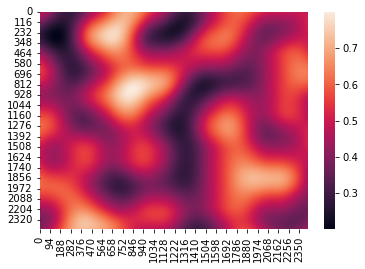

In [13]:
dim = 1214
shape = (dim,dim)
scale = 250.0 # how blurry the image is
octaves = 8 # how much variation there is
persistence = 2
lacunarity = 0.99 # lower value makes the regions look closer together

world = np.zeros(shape)
for i in tqdm(range(shape[0])):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=120)

avg_data = world
target_max = 0.8
target_min = 0.2

min_num = np.min(avg_data)
max_num = np.max(avg_data)
avg_data = (avg_data - min_num) / (max_num - min_num) * (target_max - target_min) + target_min

avg_data = cv2.resize(avg_data, (2428, 2428))

np.save("perlin_2/4.npy", avg_data)

heatmap(avg_data)